['POL' 'AUS' 'USA' 'DEU' 'MEX' 'FRA' 'BEL' 'JPN' 'NOR' 'DNK' 'GRC' 'AUT'
 'ITA' 'CAN' 'KOR' 'PRT' 'SWE' 'ESP']


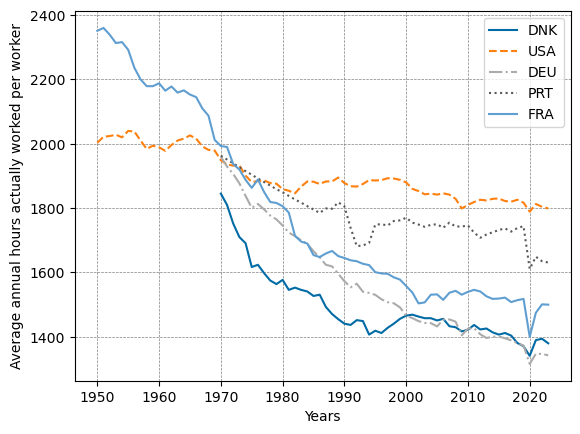

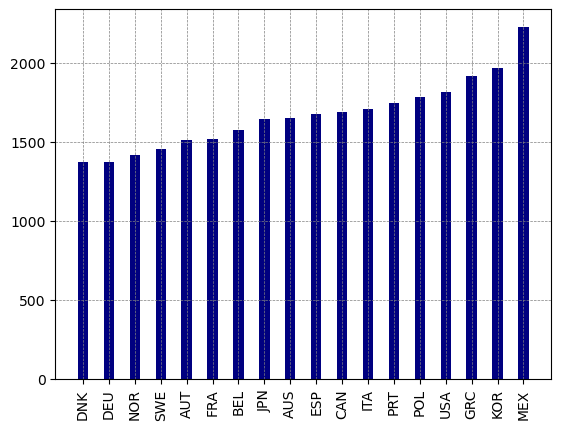

In [15]:
## Unionization
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

url = 'https://sdmx.oecd.org/public/rest/data/OECD.ELS.SAE,DSD_HW@DF_AVG_ANN_HRS_WKD,1.0/DNK+DEU+SWE+NOR+POL+PRT+FRA+USA+MEX+KOR+JPN+CHI+NED+BEL+AUT+AUS+GRC+CAN+ESP+ITA......A.._T....?startPeriod=1950&dimensionAtObservation=AllDimensions&format=csvfilewithlabels'
hours = pd.read_csv(url) 
#hours = pd.read_csv('oecd_hours.csv')


print(hours.REF_AREA.unique())
countries = ['DNK','USA','DEU','PRT', 'FRA']
plt.style.use('tableau-colorblind10')

LS =["-","--","-.",":","-","--","-.",":"]

i=0
for cc in countries:

    hours_temp = hours.loc[hours['REF_AREA'] == cc] #Unemployment rate for individuals aged 25-74
    hours_temp = hours_temp.sort_values(by= 'TIME_PERIOD')

    
    plt.plot(hours_temp.TIME_PERIOD, hours_temp.OBS_VALUE, label = cc, linestyle = LS[i])
    i+=1
plt.legend()
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylabel('Average annual hours actually worked per worker')
plt.xlabel('Years')
plt.savefig('hours_time.pdf')
plt.show()


## Hours across countries
h_cross = hours.loc[hours['TIME_PERIOD'] == 2019]
val = h_cross.OBS_VALUE.values
name = h_cross.REF_AREA.values
sortv = np.argsort(val)

plt.bar(name[sortv], val[sortv], color ='navy', 
        width = 0.4)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.xticks(rotation=90)
plt.savefig('hours_cross.pdf')
plt.show()

In [ ]:
## Real wages over time



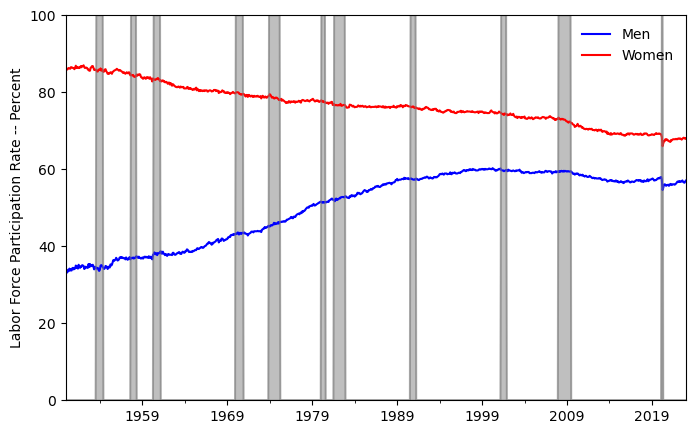

In [4]:
from fredapi import Fred #need to install this
fred = Fred(api_key='c0a963cd5bd17449f6d4b6a4e8d18f14')
mult = 100
part_male = fred.get_series('LNS11300002') #gdp
part_female = fred.get_series('LNS11300001') #unemployment
us_rec = fred.get_series('USREC')*mult #recession indicator
tmprec = us_rec*-1 #recession indicator

fig, ax = plt.subplots()
part_male.plot.line(ax=ax, figsize=(8, 5), x='DATE', color="blue", label = 'Men')
part_female.plot.line(ax=ax, figsize=(8, 5), x='DATE', color="red", label = 'Women')
us_rec.plot.area(ax=ax, figsize=(8, 5), x='DATE', alpha=0.5, color="gray")
ax.set_ylabel('Labor Force Participation Rate -- Percent')
ax.set_xlim("1950-01-01", "2023-01-01")
ax.set_ylim(0,mult)
ax.legend(frameon = False)
plt.savefig('participation.pdf')
plt.show()

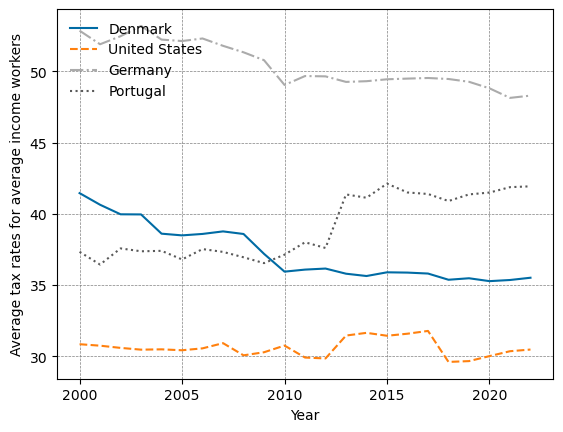

In [6]:
## Income tax rates
url = 'https://sdmx.oecd.org/archive/rest/data/OECD,DF_TABLE_I5,/USA+DNK+PRT+DEU.100.?startPeriod=2000&endPeriod=2022&dimensionAtObservation=AllDimensions&format=csvfilewithlabels'
tax = pd.read_csv(url) 

country_set = ('DNK','USA', 'DEU', 'PRT')
country_label = ('Denmark','United States', 'Germany', 'Portugal')

## Gross Domestic Product, millions, national currency, current prices
for cc in range(4):
    country = country_set[cc]
    clabel = country_label[cc]
    selector = ((tax['AVGRATES'] == 'TOT_TAX_WEDGE') &(tax['COU'] == country) )
    tax_1 = tax.loc[selector]
    tax_1 = tax_1.sort_values(by= 'TIME_PERIOD')
    
    plt.plot(tax_1.TIME_PERIOD,tax_1.OBS_VALUE, label = clabel, linestyle = LS[cc])

    
plt.legend(frameon=False,loc = 'upper left')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylabel('Average tax rates for average income workers')
plt.xlabel('Year')
plt.savefig('taxrates.pdf')

